# Compression algorithms

## Huffman encoding
Huffman encoding is a variable-length prefix code used for lossless data compression. It assigns shorter codes to frequently occurring symbols and longer codes to less frequent symbols. 

The algorithm works by constructing a table that maps each symbol to its corresponding variable-length code. The table is constructed by starting with the two least frequent symbols and combining them into a new symbol with a frequency equal to the sum of their frequencies. This process is repeated until all symbols are combined into a single root node, which represents the entire symbol set. 

The resulting codes are formed by concatenating the binary digits of the path from the root node to the leaf node representing each symbol. The codes are stored in the Huffman table and used to encode the input data. 

### Encoding:
1. Read a file, count the frequency of occurrence of every symbol (func make_items), make list of tuples (symbol, frequency)
2. Add two the least frequent symbols and make a tuple ((symbol_1, symbol_2), summary_frequency)
3. Replace their tuples with this one in the list
4. Repeat step 2 and step 3 until list contains only 1 element
5. Divide the existing set into two parts that existed during the previous addition
6. Add 0 to the code of the set with a higher frequency and 1 to the set with a lower frequency
7. Repeat until you'll have a unique code for every symbol (dict: {symbol: code})

### Decoding:
1. Take one symbol from file, check if it's a code
2. Append to it next one if not, else write this code's key
3. Repeat steps 1 and 2 until you will get your original message

In [2]:
class Huffman:
    """
    class for Huffman algorithm
    >>> h = Huffman("test.txt")
    >>> compressed = h.encode_huffman()
    >>> decompressed = h.huffman_decode(compressed)
    >>> h.message == decompressed
    True
    """
    def __init__(self, file_name: str) -> None:
        """
        Initialize a new Huffman object.

        :param file_name: Name of the file to be encoded/decoded.
        :type file_name: str
        >>> h = Huffman("test.txt")
        >>> h.file_name
        'test.txt'
        """
        self.file_name = file_name
        self.codes = {}
        with open(file_name, 'r', encoding='utf-8') as f:
            self.message = f.read()

    def encode_huffman(self) -> str:
        """
        Encode the contents of the input file using Huffman coding.

        :return: Encoded binary string.
        :rtype: str
        >>> h = Huffman("test.txt")
        >>> h.encode_huffman()
        '011110100101000000101000011100001101010011000110001010101110011010'
        """
        def assign_symbols(node, code = ''):
            if isinstance(node, tuple):
                assign_symbols(node[0], code + '0')
                assign_symbols(node[1], code + '1')
            else:
                self.codes[node] = code
        assign_symbols(self.add_probabilities()[0][0])
        with open(self.file_name, 'r', encoding='utf-8') as file:
            data = file.read()
        res = []
        for character in data:
            res.append(self.codes[character])
        return ''.join(res)

    def huffman_decode(self, code: str) -> str:
        """
        Decode a binary string using Huffman coding.

        :param code: Encoded binary string to be decoded.
        :type code: str
        :return: Decoded string.
        :rtype: str
        >>> h = Huffman("test.txt")
        >>> h.huffman_decode(h.encode_huffman())
        'this is a test message'
        """
        symbol = []
        new_message = []
        for i in code:
            symbol.append(str(i))
            for key in self.codes:
                if ''.join(symbol) == self.codes[key]:
                    new_message.append(key)
                    symbol = []
        return ''.join(new_message)
    
    def make_items(self) -> list:
        """
        Create a list of unique characters and their frequencies in the input file.

        :return: List of tuples with character-frequency pairs.
        :rtype: list
        >>> h = Huffman("test.txt")
        >>> h.make_items()
        [('h', 0.045454545454545456), ('m', 0.045454545454545456), ('g', 0.045454545454545456), ('i', 0.09090909090909091), ('a', 0.09090909090909091), ('t', 0.13636363636363635), ('e', 0.13636363636363635), (' ', 0.18181818181818182), ('s', 0.22727272727272727)]
        """
        dct = {}
        count = 0
        with open(self.file_name, 'r', encoding='utf-8') as file:
            lines = file.read()
            for line in lines:
                for i in line:
                    count += 1
                    if i not in dct:
                        dct[i] = 1
                    else:
                        dct[i] += 1
        for key in dct:
            dct[key] = dct[key]/count
        sorted_items = sorted(dct.items(), key=lambda x: x[1])
        return sorted_items

    def add_probabilities(self) -> list:
        """
        Create a tree of nodes representing the Huffman encoding of the input file.

        :return: List of tuples representing the nodes of the Huffman tree.
        :rtype: list
        >>> h = Huffman("test.txt")
        >>> h.add_probabilities()
        [((((' ', ('i', 'g')), ('e', 't')), ('s', (('m', 'h'), 'a'))), 0.9999999999999999)]
        """
        items = self.make_items()
        while len(items) > 1:
            first_elem, prob_1 = items.pop(0)
            second_elem, prob_2 = items.pop(0)
            items.append(((second_elem, first_elem),(prob_2+prob_1)))
            items = sorted(items, key=lambda x: x[1])
        return items
    
    def huffman_dict(self):
        """
        Return a dictionary of Huffman codes.

        :return: Dictionary with characters as keys and their corresponding Huffman codes as values.
        :rtype: dict
        >>> h = Huffman("test.txt")
        >>> h.encode_huffman()
        '011110100101000000101000011100001101010011000110001010101110011010'
        >>> len(h.huffman_dict())
        9
        """
        return self.codes
    
    def write_encoded_and_decoded(self):
        """
        func for writing results to files
        >>> h = Huffman("test.txt")
        >>> h.write_encoded_and_decoded()
        """
        code = self.encode_huffman()
        with open('huffman_encoded.txt', 'w', encoding='utf-8') as file:
            file.write(code)
        with open('huffman_decoded.txt', 'w', encoding='utf-8') as new_file:
            new_file.write(self.huffman_decode(code))



In [3]:
if __name__ == '__main__':
    import doctest
    print(doctest.testmod())

TestResults(failed=0, attempted=19)


In [4]:
new_text = Huffman('test.txt')
new_text.encode_huffman()
new_text.huffman_decode(new_text.encode_huffman())


'this is a test message'

## Lz77 algorithm

LZ77 is a lossless data compression algorithm that was published by Abraham Lempel and Jacob Ziv in 1977. It is a dictionary-based algorithm that achieves compression by replacing repeated occurrences of data with references to a single copy of that data existing earlier in the uncompressed data stream.

Encoder:

- There is given some string that contains text(ex. ‘abacacaccadba’)
- Call *lz77_encode* function:
    - Take first element of string and place it to out message
    - Set <offset; length; next> to each word
    - Using while loop analyse string until it’s empty
    - Check different situations: different offsets, lengths or next values
    - If initial message reaches the end, finish execution
    - Outout list of tuples

Decoder:

- There is given code in the format [(0, 0, 'a'), (0, 0, 'b'), (1, 1, 'c'), (3, 3, None)]
- If offset and length is 0, add 1 word
- If offset and length is more than 0, analyse buffer(return offset symbols back, and copy elements of length)



In [5]:
class lz77:
    """
    A class to perform LZ77 encoding and decoding on a given text.

    Args:
    - text (str): The text to be encoded.
    - buffer (int): The size of the buffer used for encoding. Default value is 5.

    Attributes:
    - buffer (int): The size of the buffer used for encoding.
    - text (str): The text to be encoded.

    Methods:
    - lz77_encode: Encodes the text using LZ77 algorithm and returns the encoded message.
    - lz77_decode: Decodes the encoded message using LZ77 algorithm and returns the original text.

    Example usage:
    ```
    >>> lz = lz77('ababcbababaaaa')
    >>> encoded_message = lz.lz77_encode()
    >>> decoded_text = lz.lz77_decode(encoded_message)
    >>> decoded_text
    'ababcbababaaaa'
    ```
    """
    def __init__(self, text: str, buffer = 5):
        self.buffer = buffer
        self.text = text
    
    def lz77_encode(self):
        """
        Encodes the text using LZ77 algorithm and returns the encoded message.

        Returns:
        - message (list of tuples): The encoded message as a list of tuples, where each tuple represents a part of the text. 
            The first element of the tuple is the offset of the longest match found in the buffer, the second element is the length of the match, 
            and the third element is the next character in the text. If there is no match in the buffer, the first and second elements are 0, 
            and the third element is the next character in the text.
        
        Example usage:
        ```
        >>> lz = lz77('ababcbababaaaa')
        >>> lz.lz77_encode()
        [(0, 0, 'a'), (0, 0, 'b'), (1, 1, 'c'), (3, 3, None), (6, 1, None), (0, 0, 'a'), (0, 0, 'a'), (0, 0, 'a')]
        ```
        """
        message = [(0, 0, self.text[0])]
        buff = self.text[0]
        self.text = self.text[1:]
        
        while self.text:
            length = 1
            while length <= len(buff):
                if self.text[0] not in buff:
                    message.append((0, 0, self.text[0]))
                elif self.text in buff:
                    offset = len(buff) - buff.index(self.text[0])
                    message.append((offset, length, None))
                    return message
                elif self.text[:length] in buff:
                    length += 1
                    continue
                else:
                    offset = len(buff) - buff.index(self.text[0])
                    message.append((offset, length-1, self.text[length-1]))
                buff += self.text[:length]
                self.text = self.text[length:]
                buff = buff[-self.buffer:]
                length = 1
        # with open('lz77decoded.txt', 'w', encoding='utf-8') as file:
        #     file.write('.'message)
        return message
    
    def lz77_decode(self, message: list):
        """
        Decodes the encoded message using LZ77 algorithm and returns the original text.

        Args:
        - message (list of tuples): The encoded message as a list of tuples, where each tuple represents a part of the text. 
            The first element of the tuple is the offset of the longest match found in the buffer, the second element is the length of the match, 
            and the third element is the next character in the text. If there is no match in the buffer, the first and second elements are 0, and the third element is the next character in the text.

        Returns:
        - decoded (str): The original text after decoding the message.

        Example usage:
        ```
        >>> lz = lz77('ababcbababaaaa')
        >>> encoded_message = lz.lz77_encode()
        >>> lz.lz77_decode(encoded_message)
        'ababcbababaaaa'
        ```
        """
        decoded = ''
        for elem in message:
            if (elem[0] and elem[1]) == 0:
                decoded += elem[2]
            else:
                if elem[2] is not None:
                    decoded += decoded[-elem[0]:(-elem[0]+elem[1])] if elem[0] > elem[1] else decoded[-elem[0]:]
                    decoded += elem[2]
                else:
                    decoded += decoded[-elem[0]:(-elem[0]+elem[1])]
        return decoded

        

In [ ]:
data = lz77('this is a test message')
data.lz77_decode(data.lz77_encode())

'this is a test message'

## LZW algorithm

LZW (Lempel-Ziv-Welch) is a lossless data compression algorithm developed by Abraham Lempel, Jacob Ziv, and Terry Welch in 1977.

Encoder:

- There is given some string that contains text(ex. ‘abacacaccadba’)
- Call *lzw_compress* function:
    - Test word's uniqueness and add them to empty array
    - Set variable to save previous word(in the end if values are equal twice we have reached the end)
    - Using while loop analyse string until it’s empty
    - Append words and code of word at the same time
    - If previous message == initial message break
    - Return index of each entered word

Decoder:

- There is given code in the format [0, 1, 0, 2, 6, 6, 7, 3, 5] and first n values of words that have length 1.
- If code < len(out message) append element to dictionary and out message
- In other situation append dictionary[code] + dictionary[code][0]

In [ ]:
"""Lempel Ziv Welch [LZW] algorithm"""

class LZW:
    """Module to perform LZW algorithm"""

    @staticmethod
    def lzw_compress(initial_msg):
        """
        Compresses a given string using the Lempel Ziv Welch algorithm.

        Args:
        initial_msg (str): The string to be compressed.

        Returns:
        list: A list of integers representing the compressed message.

        Example:
        >>> LZW.lzw_compress("abacacaccadba")
        [0, 1, 0, 2, 6, 6, 7, 3, 5]
        """
        words = []
        # test word's uniqueness
        for word in initial_msg:
            if word not in words:
                words.append(word)
        code = []

        # if values are equal twice we have reached the end
        prev_message = initial_msg
        while True:
            index = 0

            for index in range(len(initial_msg)):
                if initial_msg[:index+2] not in words:
                    words.append(initial_msg[:index+2])
                    code.append(words.index(initial_msg[:index+2][:-1]))
                    initial_msg = initial_msg[index+1:]
                    break

            if prev_message == initial_msg:
                code.append(words.index(initial_msg))
                break
            prev_message = initial_msg

        return code


    @staticmethod
    def lzw_decompress(compressed, first_n_vals):
        """
        Decompresses a compressed message using the Lempel Ziv Welch algorithm.

        Args:
        compressed (list): A list of integers representing the compressed message.
        first_n_vals (list): A list of characters representing the first n values of the original message.

        Returns:
        str: The decompressed message.

        Example:
        >>> LZW.lzw_decompress([0, 1, 0, 2, 6, 6, 7, 3, 5], ['a', 'b', 'c', 'd'])
        'abacacaccadba'
        """
        out_msg = []
        dictionary = first_n_vals[:]
        codes = compressed[:]

        for idx, code in enumerate(codes):
            out_msg.append(dictionary[code])
            if idx + 1 >= len(codes):
                break

            if code < len(out_msg):
                dictionary.append(dictionary[code] + dictionary[codes[idx + 1]][0])
            else:
                dictionary.append(dictionary[code] + dictionary[code][0])

        return "".join(out_msg)

### Output example

In [ ]:
compress = LZW().lzw_compress("abacacaccadba")
print(compress)

decompress = LZW().lzw_decompress([0, 1, 0, 2, 6, 6, 7, 3, 5], ['a', 'b', 'c', 'd'])
print(decompress)

[0, 1, 0, 2, 6, 6, 7, 3, 5]
abacacaccadba


## Deflate algorithm

Deflate is a lossless data compression algorithm that is commonly used in the compression of files in the gzip and zip file formats. Deflate was created by Phil Katz in the late 1980s as part of the development of the PKZIP file archiving tool.

The Deflate algorithm combines two other algorithms, Huffman coding and LZ77, to achieve compression. The LZ77 algorithm is used to find repeated sequences of data in the input, while Huffman coding is used to encode the repeated sequences and the remaining data in a more efficient manner.

In [17]:
class Deflate:
    """
    class for algorithm deflate
    """
    def __init__(self, filename: str) -> None:
        """
        main param: filename
        """
        self.filename = filename
        self.codes = {}
    

    def deflate(self) -> str:
        """
        func for deflate encoding
        """
        with open(self.filename, 'r', encoding="utf-8") as file:
            data = file.read()

        lz77_algorithm = lz77(data).lz77_encode()
        lz77_to_write = "".join([str(j) if j is not None else '' for i in lz77_algorithm for j in i])

        with open('lz_77_for_deflate.txt', 'w', encoding="utf-8") as new_file:
            new_file.write(lz77_to_write)

        huffman_algorithm = Huffman('lz_77_for_deflate.txt').encode_huffman()
        with open('deflate_encoded.txt', 'w', encoding='utf-8') as deflate_file:
            deflate_file.write(huffman_algorithm)
        return huffman_algorithm
    
    

    def deflate_decode(self) -> str:
        """
        func for deflate decoding
        """
        with open('deflate_encoded.txt', 'r', encoding="utf-8") as file:
            data = file.read()

        huff = Huffman('lz_77_for_deflate.txt')
        huff.encode_huffman()
        self.codes = huff.huffman_dict()
        huff_decode = self.decode_huffman(data)
        lz77_list = [(int(huff_decode[i]), int(huff_decode[i+1]), huff_decode[i+2]) for i in range(0, len(huff_decode)-2, 3)]
        lz77_list.append((int(huff_decode[-2]), int(huff_decode[-1]), None))
        message = lz77(data).lz77_decode(lz77_list)

        return message
    
    def decode_huffman(self, code: str):
        """
        additional function for decoding
        """
        symbol = []
        new_message = []
        for i in code:
            symbol.append(str(i))
            for key in self.codes:
                if ''.join(symbol) == self.codes[key]:
                    new_message.append(key)
                    symbol = []
        return ''.join(new_message)


In [19]:
defl = Deflate('test.txt')
print(defl.deflate_decode())

this is a test message


## Plot results and compare with other algorithms

In [ ]:
# Required libs
import matplotlib.pyplot as plt
import timeit
import sys

## Time comparison

Compression comparison:


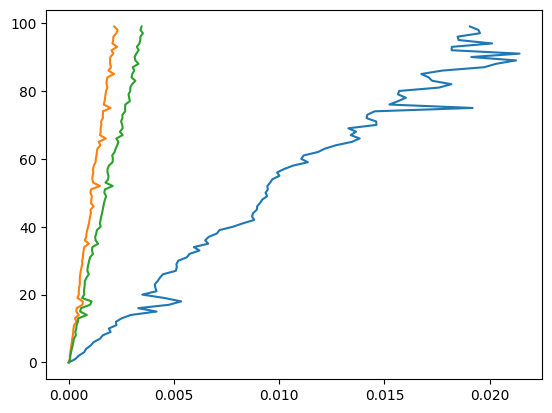

In [ ]:
# read file
with open('test.txt', 'r', encoding="utf-8") as file:
    data = file.read()

# compress
print('Compression comparison:')

x_time_huffman = []
x_time_lz77 = []
x_time_lzw = []
y_time = list(range(100))


# times to run
for repeats in range(100):
    x_time_huffman.append(timeit.timeit(lambda: Huffman('test.txt').encode_huffman(), number = repeats))
    x_time_lz77.append(timeit.timeit(lambda: lz77(data).lz77_encode(), number = repeats))
    x_time_lzw.append(timeit.timeit(lambda: LZW().lzw_compress(data), number = repeats))


plt.plot(x_time_huffman, y_time)
plt.plot(x_time_lz77, y_time)
plt.plot(x_time_lzw, y_time)

## File size comparison

In [ ]:
def read_file(file_name):
    """Read file"""
    with open(file_name, 'r', encoding="utf-8") as file:
        data = file.read()
    
    # huffman size
    huffman_algorithm = Huffman(file_name).encode_huffman()
    huffman_algorithm = [huffman_algorithm[i:i+8] for i in range(0, len(huffman_algorithm), 8)]
    huffman_algorithm = sys.getsizeof("".join([str(int(i, 2)) for i in huffman_algorithm]))

    # lz77
    lz77_algorithm = lz77(data).lz77_encode()
    lz77_algorithm = "".join([str(j) if j is not None else '' for i in lz77_algorithm for j in i])
    lz77_algorithm = sys.getsizeof(lz77_algorithm)
    
    # print(lz77_algorithm)
    print(sys.getsizeof(data))
    print(huffman_algorithm)
    print(lz77_algorithm)

# read_file('witcher.txt')

string_to_transform = '0101011'
bytes_object = bytes(string_to_transform, 'utf-8')
# print(sys.getsizeof(bytes_object))
# print(sys.getsizeof(int(string_to_transform, 2)))
# print(sys.getsizeof('0101011'))


KeyboardInterrupt: 

## Contributors

Anastasia Pelekh: Huffman, Lz77, Deflated

Dmytro Shumskyi: LZW, Lz77, Deflated